## FULL WORKING BAR CHART RACE CODE

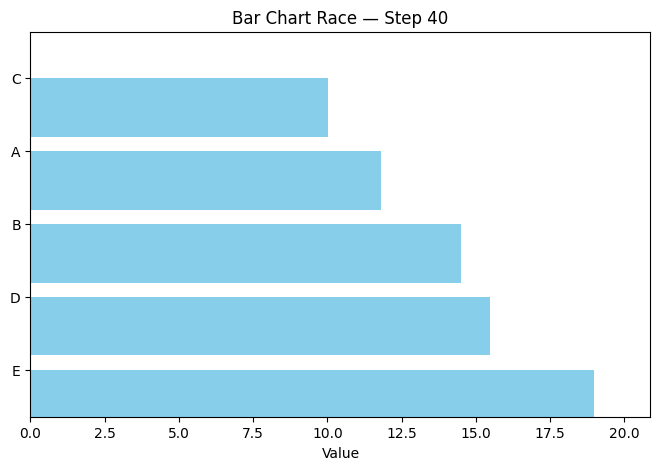

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import PillowWriter

# ---------------------------------------------------
# Create output directory
# ---------------------------------------------------
os.makedirs("gifs", exist_ok=True)

# ---------------------------------------------------
# Sample data (time × categories)
# ---------------------------------------------------
labels = ["A", "B", "C", "D", "E"]
n_steps = 40

np.random.seed(42)

data = np.abs(np.cumsum(np.random.randn(n_steps, len(labels)), axis=0))
data = data + np.linspace(1, 10, n_steps).reshape(-1, 1)

# ---------------------------------------------------
# Plot setup
# ---------------------------------------------------
fig, ax = plt.subplots(figsize=(8, 5))

y_pos = np.arange(len(labels))
bars = ax.barh(y_pos, data[0], color="skyblue")

ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.invert_yaxis()
ax.set_xlim(0, data.max() * 1.1)
ax.set_xlabel("Value")
title = ax.set_title("Bar Chart Race — Step 1")

# ---------------------------------------------------
# Animation
# ---------------------------------------------------
writer = PillowWriter(fps=4)

with writer.saving(fig, "gifs/bar_chart_race.gif", dpi=120):

    for t in range(n_steps):
        values = data[t]

        # Sort values
        order = np.argsort(values)
        sorted_vals = values[order]
        sorted_labels = [labels[i] for i in order]

        # Update bars
        for i, bar in enumerate(bars):
            bar.set_width(sorted_vals[i])
            bar.set_y(i)

        ax.set_yticks(range(len(labels)))
        ax.set_yticklabels(sorted_labels)

        title.set_text(f"Bar Chart Race — Step {t+1}")

        writer.grab_frame()

plt.show()
